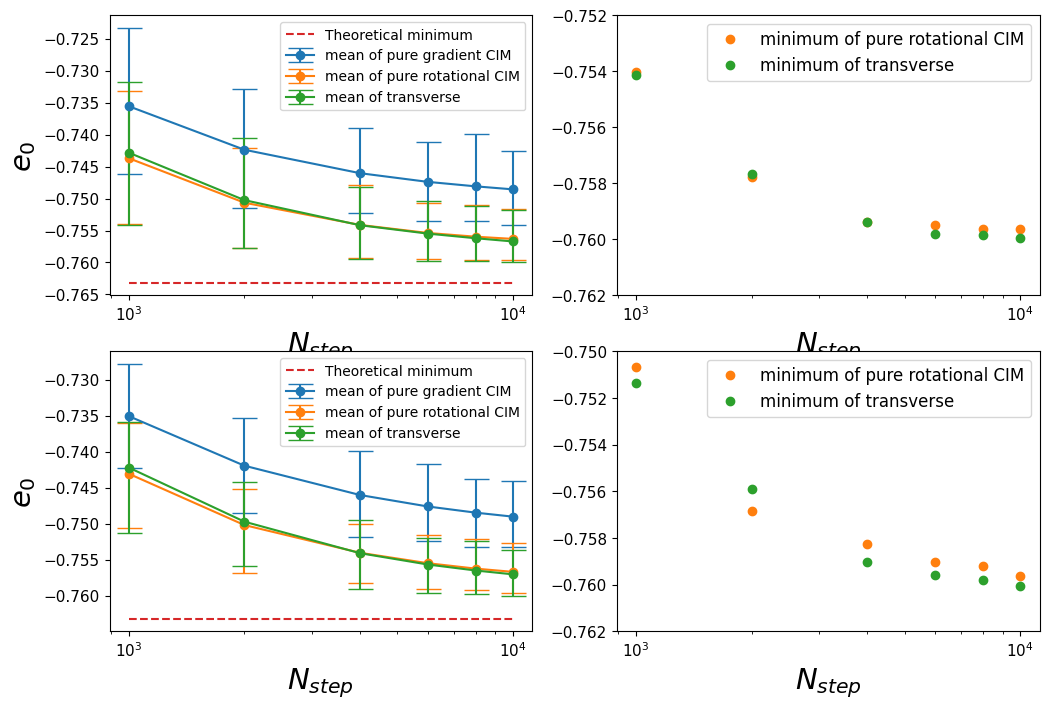

In [5]:
import numpy as np
import torch
import math
from dual_mean_field import transverse
from matplotlib import pyplot as plt

def sk_model(n,seed):
    # n=100
    variance = 1 / n
    # seed = 20
    np.random.seed(seed)
    J = np.random.normal(loc=0, scale=math.sqrt(variance), size=(n, n))

    J = np.triu(J, k=1)
    J = J + J.T
    J=torch.tensor(J)
    return J

if __name__ == "__main__":

# solving a 10000-spin SK-model problem
# hyper-parameter= [[scheme=OGM,trials=10000,n_step=[1000, 2000, 4000, 6000,8000, 10000], Delta_t=[1.296,1.287,1.299,1.295,1.304,1.301],g=0.04,gama=1   ]
#                   [scheme=pure_ratational, trials=10000, n_step=[1000, 2000, 4000, 6000,8000, 10000], Delta_t=[1.304,1.3,1.303,1.299,1.294,1.292],g=0,gama=1]
#                   [scheme=pure gradient, trails=10000,n_step=[1000, 2000, 4000, 6000,8000, 10000],Delta_t=0.77,g=1,gama=0]
#]
    J=sk_model(10000,1)
    N_step = [ 1000, 2000, 4000, 6000,8000, 10000]
    trials=10000
    n_step=N_step[0]
    beta = np.exp(np.linspace(math.log(0.1), math.log(20), n_step))
    tran = transverse(J, beta, trials, a_set=2, gama=2.6, Delta_t=0.51, g=0.01, dev='cuda:0', c0=0.5,
                      dtype=torch.float64, seed=1, FIG_energy='False')

    energy = tran.iterate_T()

    MEAN_T = torch.sum(energy, dim=0) / trials
    MIN_T = min(energy)
    MAX_T = max(energy)
# solving a 10000-spin SK-model problem
# hyper-parameter= [[scheme=OGM,trials=10000,n_step=[1000, 2000, 4000, 6000,8000, 10000], Delta_t=[1.299,1.307,1.321,1.283,1.285,1.305],g=0.04,gama=1   ]
#                   [scheme=pure_ratational, trials=10000, n_step=[1000, 2000, 4000, 6000,8000, 10000], Delta_t=[1.319,1.31,1.303,1.302,1.296,1.291],g=0,gama=1]
#                   [scheme=pure gradient, trails=10000,n_step=[1000, 2000, 4000, 6000,8000, 10000],Delta_t=0.75,g=1,gama=0]
#]
    J=sk_model(5000,1)
    N_step = [ 1000, 2000, 4000, 6000,8000, 10000]
    trials=10000
    n_step=N_step[0]
    beta = np.exp(np.linspace(math.log(0.1), math.log(20), n_step))
    tran = transverse(J, beta, trials, a_set=2, gama=2.6, Delta_t=0.51, g=0.01, dev='cuda:0', c0=0.5,
                      dtype=torch.float64, seed=1, FIG_energy='False')

    energy = tran.iterate_T()

    MEAN_T = torch.sum(energy, dim=0) / trials
    MIN_T = min(energy)
    MAX_T = max(energy)
####
####
####
####
####the results of the situation of 5000-spin sk-model solved by using all hyper-parameters
    N_step = [ 1000, 2000, 4000, 6000,8000, 10000]

#############SK(5000,1)
    MEAN_g = torch.tensor([-3677.7231, -3711.7803, -3730.1348, -3736.9158, -3740.4360, -3742.7886])
    MIN_g = torch.tensor([-3730.5471, -3757.0444, -3761.5107, -3767.1929, -3767.5623, -3770.7649])
    MAX_g = torch.tensor([-3616.6135, -3663.8936, -3694.5889, -3705.5437, -3699.6519, -3713.0596])
    MEAN_r = torch.tensor([-3718.4083,-3753.2306,-3770.6317,-3776.9017,-3779.842,-3781.57])
    MAX_r = torch.tensor([-3665.694,-3710.5252,-3739.4836,-3753.8352,-3755.0332,-3758.0097])
    MIN_r = torch.tensor([-3770.0623, -3788.8993, -3796.8337, -3797.3484, -3798.0518, -3798.1683])
    MEAN_OGM = torch.tensor([-3714.0653,-3751.2175,-3770.8677,-3777.4168,-3781.0516,-3783.5692])
    MIN_OGM = torch.tensor([-3770.6914,-3788.3115,-3796.9087,-3799.0993,-3799.125,-3799.7424])
    MAX_OGM = torch.tensor([-3659.093,-3702.9022,-3740.5733,-3751.5504,-3755.7048,-3758.8602]) 
################SK(10000,1)
    MEAN_g1 = torch.tensor([-7350.7534, -7419.5215, -7460.1870, -7476.0537, -7484.6421, -7490.1748])
    MIN_g1 = torch.tensor([-7422.5508, -7485.5503, -7517.7466, -7523.6812, -7532.9204, -7531.7046])
    MAX_g1 = torch.tensor([-7278.6890, -7352.8550, -7399.0498, -7417.7261, -7437.9888, -7440.2192])
    MEAN_r1 = torch.tensor([-7430.6664,-7501.8317,-7540.3048,-7554.7094,-7562.2528,-7566.7387])
    MAX_r1 = torch.tensor([-7360.2058,-7451.3026,-7500.0727,-7515.5823,-7521.331,-7526.5385])
    MIN_r1 = torch.tensor([-7506.5417,-7568.5628,-7582.5951,-7590.1897,-7591.9267,-7596.4559])
    MEAN_OGM1 = torch.tensor([-7422.0756,-7497.143,-7540.8443,-7556.5262,-7564.8597,-7570.1838])
    MIN_OGM1 = torch.tensor([-7513.3368,-7558.7917,-7590.1068,-7595.7245,-7598.0752,-7600.3454])
    MAX_OGM1 = torch.tensor([-7359.1739,-7442.577,-7494.3198,-7519.4971,-7524.2874,-7536.2769]) 

##########plot using the results above


    plt.figure(figsize=(12,8))
    plt.subplot(221)
    
    plt.errorbar(N_step, MEAN_g / 5000, yerr=[((MEAN_g - MIN_g) / 5000).tolist(), ((MAX_g - MEAN_g) / 5000).tolist()], marker='o',
                 capsize=9)

    plt.errorbar(N_step,MEAN_r/5000,yerr=[((MEAN_r-MIN_r)/5000).tolist(),((MAX_r-MEAN_r)/5000).tolist()],marker='o',capsize=9)
    plt.errorbar(N_step, MEAN_OGM / 5000, yerr=[((MEAN_OGM - MIN_OGM) / 5000).tolist(), ((MAX_OGM - MEAN_OGM) / 5000).tolist()], marker='o',
                 capsize=9)
    MIN_min=-0.7631667265*torch.ones(len(N_step))
    plt.plot(N_step,MIN_min,linestyle='--')
    plt.xscale('log')
    plt.yticks(fontsize=11)
    plt.xticks(fontsize=11)
    plt.legend(["Theoretical minimum","mean of pure gradient CIM","mean of pure rotational CIM",'mean of transverse'],fontsize=10)
    plt.ylabel(r'$e_{0}$',fontsize=21)
    plt.xlabel(r'$N_{step}$', fontsize=21)

    plt.subplot(222)
    # MIN_min=-0.7631667265*torch.ones(len(N_step))
    # plt.plot(N_step,MIN_min,linestyle='--')
    # # plt.plot(N_step,MIN1/2000,marker='o',linewidth=0)
    plt.plot(N_step, MIN_r / 5000, marker='o', linewidth=0,color='#ff7f0e')
    plt.plot(N_step, MIN_OGM / 5000, marker='o', linewidth=0,color='#2ca02c')
    #
    plt.xscale('log')
    plt.yticks(fontsize=11)
    plt.xticks(fontsize=11)
    # plt.legend(["Theoretical minimum","minimum of pure gradient CIM","minimum of pure divergence CIM",'minimum of transverse'])
    plt.legend(["minimum of pure rotational CIM",
                'minimum of transverse'], fontsize=12)
    # plt.ylabel('energy/N', fontsize=21)
    plt.ylim(-0.762,-0.752)#######SK(5000,1)
    # plt.ylim(-0.762, -0.75)#######SK(10000,1)
    plt.xlabel(r'$N_{step}$', fontsize=21)


    plt.subplot(223)


    plt.errorbar(N_step, MEAN_g1 / 10000, yerr=[((MEAN_g1 - MIN_g1) / 10000).tolist(), ((MAX_g1 - MEAN_g1) / 10000).tolist()],
                     marker='o',
                     capsize=9)

    plt.errorbar(N_step, MEAN_r1 / 10000, yerr=[((MEAN_r1 - MIN_r1) / 10000).tolist(), ((MAX_r1 - MEAN_r1) / 10000).tolist()], marker='o',
                 capsize=9)
    plt.errorbar(N_step, MEAN_OGM1 / 10000, yerr=[((MEAN_OGM1 - MIN_OGM1) / 10000).tolist(), ((MAX_OGM1 - MEAN_OGM1) / 10000).tolist()],
                 marker='o',
                 capsize=9)
    MIN_min = -0.7631667265 * torch.ones(len(N_step))
    plt.plot(N_step, MIN_min, linestyle='--')
    plt.xscale('log')
    plt.yticks(fontsize=11)
    plt.xticks(fontsize=11)
    plt.legend(
        ["Theoretical minimum", "mean of pure gradient CIM", "mean of pure rotational CIM", 'mean of transverse'],
        fontsize=10)
    plt.ylabel(r'$e_{0}$', fontsize=21)
    plt.xlabel(r'$N_{step}$', fontsize=21)

    plt.subplot(224)
   # MIN_min=-0.7631667265*torch.ones(len(N_step))
   # plt.plot(N_step,MIN_min,linestyle='--')
   # # plt.plot(N_step,MIN1/2000,marker='o',linewidth=0)
    plt.plot(N_step, MIN_r1 / 10000, marker='o', linewidth=0,color='#ff7f0e')
    plt.plot(N_step, MIN_OGM1 / 10000, marker='o', linewidth=0,color='#2ca02c')
#
    plt.xscale('log')
    plt.yticks(fontsize=11)
    plt.xticks(fontsize=11)
# plt.legend(["Theoretical minimum","minimum of pure gradient CIM","minimum of pure divergence CIM",'minimum of transverse'])
    plt.legend(["minimum of pure rotational CIM",
            'minimum of transverse'], fontsize=12)
    # plt.ylabel('energy/N', fontsize=21)
    # plt.ylim(-0.762,-0.752)#######SK(5000,1)
    plt.ylim(-0.762, -0.75)#######SK(10000,1)
    plt.xlabel(r'$N_{step}$', fontsize=21)
    plt.show()


    plt.show()

